Data available at : https://github.com/LianHaiMiao/Attentive-Group-Recommendation 

# **Data Exploration**

In [ ]:
import scipy.sparse as sp
import numpy as np

In [ ]:
class Config(object):
  def __init__(self):
    self.data_path='/content/'

In [ ]:

class Dataset(object):
  def __init__ (self, data_path)  :
        
        print("loading User Train Matrix...")
        self.user_trainMatrix=self.load_rating_file_as_matrix(data_path+"userRatingTrain.txt")
        print("loading Group Train Matrix...")
        self.group_trainMatrix=self.load_rating_file_as_matrix(data_path+"groupRatingTrain.txt")
        print("loading User Test Matrix...")
        self.user_testMatrix=self.load_rating_file_as_matrix(data_path+"userRatingTest.txt")
        print("loading Group Test Matrix...")
        self.group_testMatrix=self.load_rating_file_as_matrix(data_path+"groupRatingTest.txt")
        
        # process negative data
        #print("loading User Negative into User test Matrix:")
        #self.user_testMatrix=self.load_negative_data(self.user_testMatrix, data_path+"userRatingNegative.txt")
        
        #taken num items as per train data since they are different in test matrices from train matrice item counts
        self.num_users, self.num_items = self.user_trainMatrix.shape
        self.num_groups=self.group_trainMatrix.shape[0]

        #implicit matrices
        self.implicit_user_trainMatrix=np.zeros((self.user_trainMatrix.shape))
        self.implicit_user_testMatrix=np.zeros((self.user_testMatrix.shape))
        self.implicit_group_trainMatrix=np.zeros((self.group_trainMatrix.shape))
        self.implicit_group_testMatrix=np.zeros((self.group_testMatrix.shape))

        print("loading Implicit User Train Matrix...")
        self.implicit_user_trainMatrix[self.user_trainMatrix!=0]=1
        print("loading Implicit User Test Matrix...")
        self.implicit_user_testMatrix[self.user_testMatrix!=0]=1
        print("loading Implicit Group Train Matrix...")
        self.implicit_group_trainMatrix[self.group_trainMatrix!=0]=1
        print("loading Implicit Group Test Matrix...")
        self.implicit_group_testMatrix[self.group_testMatrix!=0]=1

        #group-user mapping
        print("loading Group-User Mapping Data...")
        self.group_user_Dict=self.extract_group_user_data(data_path+"groupMember.txt")

  def extract_group_user_data(self, filename):
        group_user_dict={}
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                arr[1] = arr[1].replace("\n", "")
                members=arr[1].split(",")
                if arr[0] not in group_user_dict:
                    group_user_dict[int(arr[0])]= [int(x) for x in members]
                line=f.readline()
        return group_user_dict

  def load_rating_file_as_matrix(self, filename):
        # Get number of users and items
        num_users, num_items = 0, 0
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                u,i=int(arr[0]), int(arr[1])
                num_users=max(num_users,u)
                num_items=max(num_items,i)
                line=f.readline()
      
        mat=np.zeros((num_users+1, num_items+1))
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                mat[int(arr[0])-1][int(arr[1])-1]=int(arr[2])
                line=f.readline()

        return mat

  #TBD
  def load_negative_data(self, matrixname, filename):
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                print(arr)
                line=f.readline()



In [ ]:
if __name__=='__main__':
  config=Config()
  dataset=Dataset(config.data_path)
  num_users, num_items, num_groups = dataset.num_users, dataset.num_items, dataset.num_groups



loading User Train Matrix...
loading Group Train Matrix...
loading User Test Matrix...
loading Group Test Matrix...
loading Implicit User Train Matrix...
loading Implicit User Test Matrix...
loading Implicit Group Train Matrix...
loading Implicit Group Test Matrix...
loading Group-User Mapping Data...


**Dataset Details:**

In [ ]:
print("num users, num items, num groups=({}, {}, {})".format(num_users, num_items, num_groups))
print()
print("user_traindata shape={}".format(dataset.user_trainMatrix.shape))
print("user_testdata shape={}".format(dataset.user_testMatrix.shape))
print("group_traindata shape={}".format(dataset.group_trainMatrix.shape))
print("group_testdata shape={}".format(dataset.group_testMatrix.shape))
print()
print("Implicit user_traindata shape={}".format( dataset.implicit_user_trainMatrix.shape))
print("implicit user_testdata shape={}".format(  dataset.implicit_user_testMatrix.shape))
print("implicit group_traindata shape={}".format(dataset.implicit_group_trainMatrix.shape))
print("implicit group_testdata shape={}".format( dataset.implicit_group_testMatrix.shape))
print()
print('Group User Data:')
print(dataset.group_user_Dict)

num users, num items, num groups=(602, 7710, 290)

user_traindata shape=(602, 7710)
user_testdata shape=(602, 7679)
group_traindata shape=(290, 7710)
group_testdata shape=(290, 7656)

Implicit user_traindata shape=(602, 7710)
implicit user_testdata shape=(602, 7679)
implicit group_traindata shape=(290, 7710)
implicit group_testdata shape=(290, 7656)

Group User Data:
{216: [346, 414], 217: [433, 526], 214: [559, 570], 215: [226, 294], 212: [415, 470], 213: [43, 267, 308], 210: [443, 520], 211: [53, 392], 165: [451, 496], 264: [105, 171], 265: [556, 253, 366], 218: [334, 386], 219: [199, 302], 133: [6, 126], 132: [141, 519], 131: [480, 500], 130: [179, 348], 137: [106, 524], 136: [304, 587], 135: [42, 510], 134: [113, 120], 139: [440, 545], 138: [365, 490], 166: [258, 397], 24: [27, 404], 25: [58, 252], 26: [157, 565, 431], 27: [347, 462], 20: [8, 435], 21: [152, 484], 22: [271, 502], 23: [155, 381], 160: [391, 405], 28: [597, 521], 29: [23, 523], 161: [210, 486], 289: [61, 475], 0: [21

**NOTE: Need to check :**



1.   Why is test data's item counts different from train data's
2.   Plan how to incorporate and make use of negative data wrt to each item and each user/group




# **Module Function Scripts**

**TO-DO:** 

1. group aggregate type/ group decision strategies - max, min, avg- based on group-> cant apply to whole dataset

2. wrapper- 
  a. create pseudo user based on profile 
  b. create aggregate of group strategies- **ongoing**

3. take into account sparseness

4. do user user collaborative filtering

***5. Take absolute value of q1, q2, q3... for sovial and expertise descriptor instead of statistical thresholds -DONE*** 

6. Create a linear regression model of all techniques data as t1, t2, t3.. tn and find out weights w1, w2, w3,..., wn  and predict g1, g2, .. gn data. Test ist on Test data

**A. Gartrell, M., Xing, X., Lv, Q., Beach, A., Han, R., Mishra, S., & Seada, K. (2010, November). Enhancing group recommendation by incorporating social relationship interactions. In Proceedings of the 16th ACM international conference on Supporting group work (pp. 97-106).**

***1. Social Relationship***

***Point to ne noted***: Since we dont have personal relationship data, we have taken the similarity based on what kinds of items are preffered to be viwed by two users based on any factor (eg poster of movies, directors, movie genre etc) Whethert they like the item or not comes after that, but the common items denote preference based on some factor which led the users to at least view the same items so that they could rate the item

In [ ]:
def social_descriptor_Statistical_thresholding_func(user_trainMatrix):
    similarity_in_group=np.zeros(num_groups)

    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]
      sum_of_weight_similarities=0


      for i in range(len(group_members)):
        for j in range(i+1,len(group_members)):
          user1=group_members[i]
          user2=group_members[j]
          if user1 != user2:
            w_ij=0
            user1_items=np.nonzero(user_trainMatrix[user1])[0]
            user2_items=np.nonzero(user_trainMatrix[user2])[0]
            common_items = set(user1_items).intersection(user2_items)
            num_common_items = len(common_items)
            total_items = set(user1_items).union(user2_items)
            num_total_items = len(total_items)

            w_ij=num_common_items/num_total_items
            sum_of_weight_similarities+=w_ij
      similarity_in_group[group_id]=(2*sum_of_weight_similarities)/(len(group_members)*(len(group_members)-1))

    #print(similarity_in_group)  

    social_descriptor_groupwise=np.zeros(num_groups)
    sorted_values = sorted(similarity_in_group)

    # Compute the statistical thresholds for each category (since we dont have very strong similarities in any group)
    q1 = sorted_values[int(len(sorted_values) * 0.33)]
    q2 = sorted_values[int(len(sorted_values) * 0.67)]


    #print(q1,",",q2)

    for i in range(num_groups):
            if similarity_in_group[i] <= q1:
                social_descriptor_groupwise[i]=0
            elif similarity_in_group[i] <= q2:
                social_descriptor_groupwise[i]=1
            else:
                social_descriptor_groupwise[i]=2

    #print(social_descriptor_groupwise) 
    return social_descriptor_groupwise

In [ ]:
def social_descriptor_func(user_trainMatrix):
    similarity_in_group=np.zeros(num_groups)

    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]
      sum_of_weight_similarities=0


      for i in range(len(group_members)):
        for j in range(i+1,len(group_members)):
          user1=group_members[i]
          user2=group_members[j]
          if user1 != user2:
            w_ij=0
            user1_items=np.nonzero(user_trainMatrix[user1])[0]
            user2_items=np.nonzero(user_trainMatrix[user2])[0]
            common_items = set(user1_items).intersection(user2_items)
            num_common_items = len(common_items)
            total_items = set(user1_items).union(user2_items)
            num_total_items = len(total_items)

            w_ij=num_common_items/num_total_items
            sum_of_weight_similarities+=w_ij
      similarity_in_group[group_id]=(2*sum_of_weight_similarities)/(len(group_members)*(len(group_members)-1))

    #print(similarity_in_group)  

    social_descriptor_groupwise=np.zeros(num_groups)
 


    #print(q1,",",q2)

    for i in range(num_groups):
            if similarity_in_group[i] <= 0.33:
                social_descriptor_groupwise[i]=0
            elif similarity_in_group[i] <= 0.67:
                social_descriptor_groupwise[i]=1
            else:
                social_descriptor_groupwise[i]=2

    #print(social_descriptor_groupwise) 
    return social_descriptor_groupwise

***2. Expertise descriptor***

In [ ]:
def expertise_descriptor_func(user_trainMatrix):
    #calculate absolute user expertise
    user_expertise=np.zeros(num_users)
    x=0
    for user_data in user_trainMatrix:
        #print(user_data)
        user_i_item_count=len(np.nonzero(user_data)[0])
        #print(user_i_item_count)
        user_expertise[x]=user_i_item_count/num_items
        x+=1

    #print(user_expertise)
    absolute_user_expertise_levels=np.zeros(num_users)
    
    q1 = 0.2
    q2 = 0.4
    q3 = 0.6
    q4 = 0.8

    #print(q1,",",q2,",",q3,",",q4)

    for i in range(num_users):
            if user_expertise[i] <= q1:
                absolute_user_expertise_levels[i]=1
            elif user_expertise[i] <= q2:
                absolute_user_expertise_levels[i]=2
            elif user_expertise[i] <= q3:
                absolute_user_expertise_levels[i]=3
            elif user_expertise[i] <= q4:
                absolute_user_expertise_levels[i]=4
            else:
                absolute_user_expertise_levels[i]=5

    #print(absolute_user_expertise_levels)

    #uncomment this line for 2d sparse matrix
    expertise_in_group_members_mat=np.zeros((num_groups, num_users))
    #uncomment this line for dictionary of list(of dicts)
    #expertise_in_group_members_dict={}

    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]

      sum_of_expertise_in_group=0 
      for user in group_members:
          sum_of_expertise_in_group+=absolute_user_expertise_levels[user]
      list_of_member_expertise_groupwise=[] 
      for user in group_members:
          user_relative_expertise_pair={}
          E_j=absolute_user_expertise_levels[user]/sum_of_expertise_in_group
          user_relative_expertise_pair[user]=E_j

          #uncomment this line for 2d sparse matrix
          expertise_in_group_members_mat[group_id][user]=E_j
          #uncomment this two lines for dictionary of list(of dicts)
          #list_of_member_expertise_groupwise.append(user_relative_expertise_pair)
      #expertise_in_group_members_dict[group_id]=list_of_member_expertise_groupwise

    return expertise_in_group_members_mat
    #print(expertise_in_group_members_mat[1])



***3. Dissimilarity descriptors***

**For Explicit Rating- taking rating of items into consideration**

---



a. Dis_1: APD(Average Pairwise Dissimilarity)

In [ ]:
def explicit_APD_func(user_trainMatrix):
    #explicit APD

    APD_mat=np.zeros((num_groups, num_items))

    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]
      num_members=len(group_members)
      for item in range(num_items):
          sum_rating_deviation=0
          sum_rating_deviation = sum(abs(user_trainMatrix[i][item]-user_trainMatrix[j][item]) for i in range(num_members) for j in range(i+1, num_members))


          APD_mat[group_id][item]=(2*sum_rating_deviation)/(num_members*(num_members-1))
    return APD_mat
    #print(APD_mat)

b. Dis_2: VD(Variance Dissimilarity)

In [ ]:
def explicit_VD_func(user_trainMatrix):
    #explicit VD

    VD_mat=np.zeros((num_groups, num_items))

    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]
      num_members=len(group_members)


      for i in range(num_items):
          avg_for_item_groupwise = sum(user_trainMatrix[group_members[m]][i] for m in range(num_members)) / (num_members)
          sum_rating_deviation_from_avg=0
          for j in range(num_members):
                sum_rating_deviation_from_avg+= (user_trainMatrix[group_members[j]][i]-avg_for_item_groupwise)**2
          VD_mat[group_id][i]=sum_rating_deviation_from_avg/num_members
    return VD_mat
    #print(VD_mat)

***4. Heuristic group concensus function***

In [ ]:
def concensus_heuristic_function(social_descriptor_groupwise, expertise_in_group_members_mat, dissimilarity_mat,  user_trainMatrix, w_1, w_2):
    #using Dis_1= APD
    #w_1=0.8
    #w_2=0.2

    overall_group_item_output_mat=np.zeros((num_groups, num_items))
    for group_id in dataset.group_user_Dict:
      group_members= dataset.group_user_Dict[group_id]
      num_members=len(group_members)

      #Ei_Rix=np.zeros((num_members,num_items))
      #x=0
      #for member in group_members:
      #    for item in range(num_items):
      #        Ei_Rix[x][item]=expertise_in_group_members_mat[group_id][member]*user_trainMatrix[member][item]
      #    x+=1
    #
      Ei_Rix = np.array([[expertise_in_group_members_mat[group_id][member] * user_trainMatrix[member][item] for item in range(num_items)] for member in group_members])


      for item in range(num_items): 
          if social_descriptor_groupwise[group_id]==0:
              overall_group_item_output_mat[group_id][item]= w_1*min(Ei_Rix[:, item].tolist())+w_2*dissimilarity_mat[group_id][item] #min_misery
          elif social_descriptor_groupwise[group_id]==1:
              overall_group_item_output_mat[group_id][item]= w_1*(sum(Ei_Rix[:, item].tolist()) / len(Ei_Rix[:, item].tolist()))+w_2*dissimilarity_mat[group_id][item] #avg_satisfaction
          elif social_descriptor_groupwise[group_id]==2:
              overall_group_item_output_mat[group_id][item]= w_1*max(Ei_Rix[:, item].tolist())+w_2*dissimilarity_mat[group_id][item] #max_satisfaction

    return overall_group_item_output_mat
    #print(overall_group_item_output_mat_APD)

## **SECOND ALGORITHM : MATRIX FACTORIZATION**

**Explicit MF**

In [ ]:
from os import SEEK_DATA
import re
import math
from sklearn.utils import shuffle
class MF:
    def __init__(self, train_mat, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False, seed=0):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        #self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = num_users, num_items
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
       # self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.seed=seed
        np.random.seed(self.seed)
        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized

        ##added code
        #self.test_non_zero= self.test_mat.nonzero()
        self.train_non_zero=self.train_mat.nonzero()
    
        self.decay_rate = decay_rate
        # Define the step size and number of epochs
        self.step_size = step_size
        self.step_enabled=step_enabled
        


    # Define the learning rate scheduler function with exponential decay+step size
    def lr_schedule2(self, epoch):
        # Calculate the learning rate for the current epoch
        lr = self.lr * math.pow(self.decay_rate, math.floor((1+epoch)/self.step_size))
        return lr


        # Define the learning rate schedule function with exponential decay
    def lr_schedule1(self, epoch):
            lr = self.lr * math.exp(-self.decay_rate * epoch)
            return lr

    def train(self, epoch=20, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        #epoch_loss_list = []
        #epoch_test_RMSE_list = []
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            and at the end of each epoch, print out the epoch number, the training loss after this epoch, 
            and the test RMSE after this epoch
            """
            print("epoch=", ep)

            #Enable accordingly
            if self.step_enabled==False:
                lr = self.lr_schedule1(ep+1)
            else:
                lr = self.lr_schedule2(ep+1)
            np.random.seed(self.seed)

            shuffled_idx=np.random.choice(self.num_sample,size=self.num_sample,replace=False)
            for idx in shuffled_idx:
              user=self.sample_user[idx]
              item=self.sample_movie[idx]
              
              #print("p[user]=", self.P[user], ", len=", len(self.P[user]))
              #print("q[item]=", self.Q[item], ", len=", len(self.Q[item]))
              ## Concurrently updated
              self.P[user], self.Q[item]=self.P[user]-lr*(2*(self.P[user].dot(self.Q[item])-self.train_mat[user,item])*self.Q[item] +2*self.reg*self.P[user]), self.Q[item]-lr*(2*((self.P[user].dot(self.Q[item])-self.train_mat[user,item])*self.P[user]+2*self.reg*self.Q[item]))
              
            pred_mat=self.predict()
            #epoch_loss_list.append(np.sqrt(np.square(self.train_mat[self.train_non_zero]-pred_mat[self.train_non_zero]).mean()))
            #epoch_test_RMSE_list.append(np.sqrt(np.square(self.test_mat[self.test_non_zero]-pred_mat[self.test_non_zero]).mean()))

            #if verbose:
             # print(f'Epoch {ep+1} Training Loss :{epoch_loss_list[-1]} Testing Loss: {epoch_test_RMSE_list[-1]}')
            
            """
            End of your code for this function
            """
        #return epoch_loss_list, epoch_test_RMSE_list

        #print(self.P)
        #print(self.Q)
        #print(pred_mat)
        return pred_mat
        
        
    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

  

Improved MF explicit

In [ ]:
# implement your improved model and print out the RMSE
# Your Code Here...
import re
from sklearn.utils import shuffle
class IMPROVED_MF(object):
    def __init__(self, train_mat, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False, seed=0):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        #self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.seed=seed
        np.random.seed(seed)
        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        # self.bu=np.random.random(self.num_user)
        self.bu=np.zeros(self.num_user)
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized
        # self.bi=np.random.random(self.num_movie)
        self.bi=np.zeros(self.num_movie)
        ##added code
        #self.test_non_zero= self.test_mat.nonzero()
        self.train_non_zero=self.train_mat.nonzero()
        self.mu=np.true_divide(self.train_mat.sum(),(self.train_mat!=0).sum())
        
        self.decay_rate = decay_rate
        # Define the step size and number of epochs
        self.step_size = step_size
        self.step_enabled=step_enabled


    # Define the learning rate scheduler function with exponential decay+step size
    def lr_schedule2(self, epoch):
        # Calculate the learning rate for the current epoch
        lr = self.lr * math.pow(self.decay_rate, math.floor((1+epoch)/self.step_size))
        return lr


    # Define the learning rate schedule function
    def lr_schedule1(self, epoch):
            lr = self.lr * math.exp(-self.decay_rate * epoch)
            return lr

    def train(self, epoch=20, verbose=True):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        Output: epoch_loss_list -- a list recording the training loss for each epoch
                epoch_test_RMSE_list -- a list recording the testing RMSE after each training epoch
        """
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        np.random.seed(0)
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            and at the end of each epoch, print out the epoch number, the training loss after this epoch, 
            and the test RMSE after this epoch
            """
            print("epoch=", ep)
            
            #Enable accordingly
            if self.step_enabled==False:
                lr = self.lr_schedule1(ep+1)
            else:
                lr = self.lr_schedule2(ep+1)
            np.random.seed(self.seed)

            shuffled_idx=np.random.choice(self.num_sample,size=self.num_sample,replace=False)
            for idx in shuffled_idx:
              user=self.sample_user[idx]
              item=self.sample_movie[idx]
              error=self.mu+self.bi[item]+self.bu[user]+self.P[user].dot(self.Q[item])-self.train_mat[user,item]
              Pu=self.P[user]
              Qi=self.Q[item]
              self.P[user],self.Q[item]=Pu-self.lr*(2*error*Qi+2*self.reg*Pu),Qi-self.lr*(2*error*Pu+2*self.reg*Qi)
              self.bi[item]=self.bi[item]-self.lr*2*error
              self.bu[user]=self.bu[user]-self.lr*2*error

            pred_mat=self.predict()
    #       epoch_loss_list.append(np.sqrt(np.square(self.train_mat[self.train_non_zero]-pred_mat[self.train_non_zero]).mean()))
    #       epoch_test_RMSE_list.append(np.sqrt(np.square(self.test_mat[self.test_non_zero]-pred_mat[self.test_non_zero]).mean()))

    #       if verbose:
    #         print(f'Epoch {ep+1} Training Loss :{epoch_loss_list[-1]} Testing Loss: {epoch_test_RMSE_list[-1]}')
    #       

    #       
    #       
    #       """
    #       End of your code for this function
    #       """
    #   return epoch_loss_list, epoch_test_RMSE_list
        return pred_mat
        
        
    def predict(self):
      
        prediction_mat = self.mu+self.bu.reshape(-1,1)+self.bi+np.matmul(self.P, self.Q.T)
        return prediction_mat


# **Permuted Pipeline creation**

**DISCUSS: How do we create?**
1. Do we generate top 1000 from each algo and take intersection and then output top 50?
2. Do we create top 1000 from first algorithm, reduce no of columns of entire dataset, perform second algorithm to output 900 items, then reduce trainset to those common items and so on.. in the end take top 50?

# **Rank top k**

In [ ]:
def rank_top_k(group_item_mat, k):
    ranked_top_k=[]
    for group_data in group_item_mat:
        sorted_top_k_groupwise=sorted(range(len(group_data)), key=lambda i: group_data[i], reverse=True)[:k]
        ranked_top_k.append(sorted_top_k_groupwise)

    return ranked_top_k

# **Evaluation**

**DISCUSS:**

1. Should we use group train data as validation set and predict new recommendations for test data?
2. Should we add some weight to training data and perform:
  new recommendation= (W * group_train_data) + ((1-W)* generated recommendation from individual data)

**EXPLICIT RECOMMENDATION PERFORMANCE**

**A. NDCG**

In [ ]:

from sklearn.metrics import dcg_score, ndcg_score
def ndcg_func(y_true, y_pred):
  ndcg = []
  for i in range(len(y_true)):
      true_row = y_true[i]
      pred_row = y_pred[i]
      dcg = dcg_score([true_row], [pred_row])
      ndcg_row = ndcg_score([true_row], [pred_row])
      ndcg.append(ndcg_row)
  return ndcg
  #print(ndcg)

**B. RMSE**

In [ ]:
# Calculate RMSE row-wise
def rmse_2d(arr1, arr2):
    """
    Calculate the root mean squared error (RMSE) row-wise between two 2D arrays.
    """
    # Calculate the mean squared error (MSE) row-wise
    mse=0
    for i in range(len(arr1)):
      if arr1[i]!=0:
          mse+=(np.array(arr1[i]) - np.array(arr2[i]))**2
    mse = mse/len(arr1)
    # Calculate the RMSE row-wise
    rmse = np.sqrt(mse)
    return rmse

def rmse_func(y_true, y_pred_top_k_indices, y_pred_total):
  k=len(y_pred_top_k_indices[0])
  rmse_total=[]
  for group_id in range(len(y_pred_top_k_indices)):
      y_true_list=[]
      y_pred_list=[]
      for item_id in y_pred_top_k_indices[group_id]:
          y_true_list.append(y_true[group_id][item_id])
          y_pred_list.append(y_pred_total[group_id][item_id])
      rmse_row=rmse_2d(y_true_list, y_pred_list)
      rmse_total.append(rmse_row)
  return rmse_total
  #print(rmse_total)

# **Graph PLot Functions**

**EXPLICIT RECOMMENDATION TECHNIQUES**

In [ ]:
#plot ndcg
import matplotlib.pyplot as plt
  
def ndcg_explicit_plot(ndcg_explicit ):
    # corresponding x axis values
    x = list(range(1, num_groups+1))

    #fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Group Id')
    ax.set_ylabel('NDCG')
    #ax.plot(x, Precision_at_k, color='blue')
    
    ax.bar(x, ndcg_explicit[0], color='red')#VD
    #ax.bar(x, ndcg_explicit[1], color='blue')#APD
  

    # function to show the plot
    plt.show()

In [ ]:
#plot rmse
import matplotlib.pyplot as plt

def rmse_explicit_plot(rmse_explicit ):
  
    # corresponding x axis values
    x = list(range(1, num_groups+1))

    #fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Group Id')
    ax.set_ylabel('RMSE')
    #ax.plot(x, Precision_at_k, color='blue')
    ax.bar(x, rmse_explicit[0], color='red') #vd
    #ax.bar(x, rmse_explicit[1], color='blue') #apd

    # function to show the plot
    plt.show()

# **Analysis**

In [ ]:
#permuted pipeline creation
#EXPLICIT



def entire_algo1(Flags,user_trainMatrix, group_trainMatrix, w_1=0.8, w_2=0.2, Graph_Plot=False ):

    import time
    start = time.time()

    #Calculate Group Descriptors
    #Social Descriptor
    if Flags[0]==1:
        social_descriptor_groupwise=social_descriptor_func(user_trainMatrix)
    else:
        if Flags[0]==0 and Flags[1]==1 and Flags[2]==0 and Flags[3]==0:
            social_descriptor_groupwise=np.full(num_groups, 2)
        elif Flags[0]==0 and Flags[1]==0 and Flags[2]==1 and Flags[3]==0:
            social_descriptor_groupwise=a = np.full(num_groups, 1)
        elif Flags[0]==0 and Flags[1]==0 and Flags[2]==0 and Flags[3]==1 :
            social_descriptor_groupwise=np.zeros(num_groups)
        else: 
            print("Wrong value for social descriptor!!! Program Terminating...")
            sys.exit()

    #Expertise Descriptor
    if Flags[4]==1:
        expertise_in_group_members_mat=expertise_descriptor_func(user_trainMatrix)
    else:
        expertise_in_group_members_mat=np.ones((num_groups, num_users))


    #Dissimilarity Descriptor
    if Flags[5]==1:
        if Flags[6]==1 and Flags[7]==0 and Flags[8]==0 and Flags[9]==0 :
            Dissimilarity_mat=explicit_APD_func(user_trainMatrix)
        elif Flags[6]==0 and Flags[7]==1 and Flags[8]==0 and Flags[9]==0:
            Dissimilarity_mat=explicit_VD_func(user_trainMatrix)
       # elif Flags[6]==0 and Flags[7]==0 and Flags[8]==1 and Flags[9]==0:
       #     Dissimilarity_mat=implicit_dissimilarity_jaccard_func(dataset.implicit_user_trainMatrix)
       # elif Flags[6]==0 and Flags[7]==0 and Flags[8]==0 and Flags[9]==1:
      #    import pickle
      #    with open("Dissimilarity_mat_implicit_using_pearson.pkl", "rb") as f:
      #        # load the pickled object from the file
      #        Dissimilarity_mat = pickle.load(f)
        else: 
            print("Wrong value for Expertise descriptor!!! Program Terminating...")
            sys.exit()
    else:
        Dissimilarity_mat=np.zeros((num_groups, num_items)) #to

    #Calculate Heuristic Concensus Function using Dis= APD/VD Explicit
    overall_group_item_output_mat=concensus_heuristic_function(social_descriptor_groupwise, expertise_in_group_members_mat, Dissimilarity_mat,  user_trainMatrix, w_1, w_2)
    #print(social_descriptor_groupwise)
    #print(expertise_in_group_members_mat)
    #print(Dissimilarity_mat)
    #Top k Ranking
    top_k_indices_output_explicit=rank_top_k(overall_group_item_output_mat, 100)
    #print(top_k_indices_output_explicit)

    end = time.time()
    total_time = end - start
    print("\n"+ str(total_time))

    #EXPLICITCalculate NDCG and RMSE
    mean_ndcg_explicit=0.0
    mean_rmse_explicit=0.0

    y_pred = sorted(top_k_indices_output_explicit)
    y_true = sorted(rank_top_k(group_trainMatrix, 100))



    ndcg_explicit=ndcg_func(y_true, y_pred)
    #print('ndcg_explicit_APD:')
    #print(ndcg_explicit_APD)
    mean_ndcg_explicit = sum(ndcg_explicit) / len(ndcg_explicit)
    print("Mean of ndcg_explicit={}".format(mean_ndcg_explicit))

    #print()
    #ndcg_explicit_VD=ndcg_func(y_true, y_pred_VD)
    ##print('ndcg_explicit_VD:')
    ##print(ndcg_explicit_VD)
    #mean_ndcg_explicit_VD = sum(ndcg_explicit_VD) / len(ndcg_explicit_VD)
    #print("Mean of ndcg_explicit_VD={}".format(mean_ndcg_explicit_VD))

    #rmse_explicit=rmse_func(dataset.group_trainMatrix, social_relation_output_explicit, overall_group_item_output_mat)
       
    
    rmse_explicit=rmse_func(group_trainMatrix, top_k_indices_output_explicit, overall_group_item_output_mat)
    #print('rmse_explicit_APD:')
    #print(rmse_explicit_APD)
    mean_rmse_explicit = sum(rmse_explicit) / len(rmse_explicit)
    print("Mean of rmse_explicit={}".format(mean_rmse_explicit))

    #print()
    #rmse_explicit_VD=rmse_func(dataset.group_trainMatrix, social_relation_output_VD_explicit, overall_group_item_output_mat_VD)
    ##print('rmse_explicit_VD:')
    ##print(rmse_explicit_VD)
    #mean_rmse_explicit_VD = sum(rmse_explicit_VD) / len(rmse_explicit_VD)
    #print("Mean of rmse_explicit_VD={}".format(mean_rmse_explicit_VD))

    if Graph_Plot==True:
        ndcg_explicit_list=[]
        ndcg_explicit_list.append(ndcg_explicit)
        #ndcg_explicit.append(ndcg_explicit_VD)
        #ndcg_explicit.append(ndcg_explicit_APD)
        ndcg_explicit_plot(ndcg_explicit_list )

        rmse_explicit_list=[]
        rmse_explicit_list.append(rmse_explicit)
        #rmse_explicit.append(rmse_explicit_VD)
        #rmse_explicit.append(rmse_explicit_APD)
        rmse_explicit_plot(rmse_explicit_list )
    

    return overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit



In [ ]:
#FLAGS
import sys


#Social_descriptor_enable=False #1
#Social_assumption_similar=(Social_descriptor_enable==False) and False #max satisfaction #2
#Social_assumption_diverse=(Social_descriptor_enable==False) and False #avg satisfaction #3
#Social_assumption_dissimilar=(Social_descriptor_enable==False) and True #min misery #4
#Expertise_descriptor_enable=True #5
#Dissimilarity_enable=True #6
#Dissimilarity_APD_enable=Dissimilarity_enable and False #7
#Dissimilarity_VD_enable=Dissimilarity_enable and True #8
#Dissimilarity_Jaccard_enable=Dissimilarity_enable and False #9
#Dissimilarity_Pearson_enable=Dissimilarity_enable and False #10
Flags=[0,1,0,0,1,1,1,0,0,0]


**Valid Combinations:** 

** base case: social+expertise+apd **


Flags=[1,0,0,0,1,1,1,0,0,0] #estimated social

Flags=[0,1,0,0,1,1,1,0,0,0] #max satisfaction

Flags=[0,0,1,0,1,1,1,0,0,0] #avg satisfaction

Flags=[0,0,0,1,1,1,1,0,0,0] #min misery


---


**#explicit**

Flags=[1,0,0,0,0,0,0,0,0,0] #no experstise+ no dissimilarity

Flags=[0,1,0,0,0,0,0,0,0,0]

Flags=[0,0,1,0,0,0,0,0,0,0]

Flags=[0,0,0,1,0,0,0,0,0,0]


---



Flags=[1,0,0,0,0,1,1,0,0,0] #no experstise+apd

Flags=[0,1,0,0,0,1,1,0,0,0]

Flags=[0,0,1,0,0,1,1,0,0,0]

Flags=[0,0,0,1,0,1,1,0,0,0]


---



Flags=[1,0,0,0,1,1,0,1,0,0] #experstise+vd

Flags=[0,1,0,0,1,1,0,1,0,0]

Flags=[0,0,1,0,1,1,0,1,0,0]

Flags=[0,0,0,1,1,1,0,1,0,0]


---



Flags=[1,0,0,0,0,1,0,1,0,0] #no experstise+vd

Flags=[0,1,0,0,0,1,0,1,0,0]

Flags=[0,0,1,0,0,1,0,1,0,0]

Flags=[0,0,0,1,0,1,0,1,0,0]


---



**#implicit**

Flags=[1,0,0,0,1,1,0,0,1,0] #experstise+jaccard

Flags=[0,1,0,0,1,1,0,0,1,0]

Flags=[0,0,1,0,1,1,0,0,1,0]

Flags=[0,0,0,1,1,1,0,0,1,0]


---



Flags=[1,0,0,0,0,1,0,0,1,0] #no experstise+jaccard

Flags=[0,1,0,0,0,1,0,0,1,0]

Flags=[0,0,1,0,0,1,0,0,1,0]

Flags=[0,0,0,1,0,1,0,0,1,0]


---


Flags=[1,0,0,0,1,1,0,0,0,1] #experstise+pearson

Flags=[0,1,0,0,1,1,0,0,0,1]

Flags=[0,0,1,0,1,1,0,0,0,1]

Flags=[0,0,0,1,1,1,0,0,0,1]


---


Flags=[1,0,0,0,0,1,0,0,0,1] #no experstise+pearson

Flags=[0,1,0,0,0,1,0,0,0,1]

Flags=[0,0,1,0,0,1,0,0,0,1]

Flags=[0,0,0,1,0,1,0,0,0,1]


---



**Case1: general**

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
_,_,_=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


10.653153657913208
Mean of ndcg_explicit=0.8361612486150191
Mean of rmse_explicit=32.52917062435187


In [ ]:
Flags=[0,1,0,0,1,1,1,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


20.619113206863403
Mean of ndcg_explicit=0.8346756663584216
Mean of rmse_explicit=24.206841732487536


In [ ]:
Flags=[0,0,1,0,1,1,1,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


24.91676664352417
Mean of ndcg_explicit=0.8325190937532824
Mean of rmse_explicit=31.289882779687122


In [ ]:
Flags=[0,0,0,1,1,1,1,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.74669361114502
Mean of ndcg_explicit=0.8361612486150191
Mean of rmse_explicit=32.52917062435187


**CASE2: take dense MF output as input- Exponential Decay LR**
--Enable lr_schedule1() in code


In [ ]:
mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False)
dense_user_train_data = mf.train(epoch=40)

In [ ]:
dense_user_train_data

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


19.17787504196167
Mean of ndcg_explicit=0.8398267908279294
Mean of rmse_explicit=14.579908297249018


**Case 3: IMPROVED MF(considering Baseline +MF)**
--Enable lr_schedule1() in code

In [ ]:
mf = IMPROVED_MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False)
dense_user_train_data_improved_MF = mf.train(epoch=40)

In [ ]:
dense_user_train_data_improved_MF

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
entire_algo1(Flags, dense_user_train_data_improved_MF, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


18.505178928375244
Mean of ndcg_explicit=0.8365431427667193
Mean of rmse_explicit=7.029578370214411


**Case4: MF Explicit _ Exponential decay with step size LR**
--Enable lr_schedule2() in code

In [ ]:
mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=True)
dense_user_train_data = mf.train(epoch=40)

epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39


In [ ]:
dense_user_train_data

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit= entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


17.900675773620605
Mean of ndcg_explicit=0.8423813443624866
Mean of rmse_explicit=15.950268434632227


In [ ]:
import pickle
# open a file in binary mode to write the pickled data
with open("Predicted.pkl", "wb") as f:
    # dump the object into the file
    pickle.dump(overall_group_item_output_mat, f)

import pickle
# open a file in binary mode to write the pickled data
with open("Ground_Truth.pkl", "wb") as f:
    # dump the object into the file
    pickle.dump(dataset.group_trainMatrix, f)

**Case 5: Improved MF(considering baseline +MF) + exponential decay with step size LR**
--Enable lr_schedule2() in code

In [ ]:
mf = IMPROVED_MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=True)
dense_user_train_data_improved_MF = mf.train(epoch=40)

In [ ]:
dense_user_train_data_improved_MF

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
entire_algo1(Flags, dense_user_train_data_improved_MF, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


18.450401544570923
Mean of ndcg_explicit=0.8327054791765449
Mean of rmse_explicit=7.207543110588797


# ***FINDING BEST w1 and w2 for HEURISTIC CONSENSUS FUNCTION***

**Best Result Case Considered i.e. **Case4: MF Explicit _ Exponential decay with step size LR**
--Enable lr_schedule2() in code **

In [ ]:
mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=True)
dense_user_train_data_approx = mf.train(epoch=40)

In [ ]:
dense_user_train_data_approx

In [ ]:
Flags=[1,0,0,0,1,1,1,0,0,0]
mean_ndcg_explicit_list=[] 
mean_rmse_explicit_list=[]
w_1=0.0
w_2=1.0
while w_1<=1.0 and w_2>=0.0 and w_1+w_2==1.0:
    print("Processing w_1 and w_2=", w_1, ", ", w_2)
    mean_ndcg_explicit_instance=0.0
    mean_rmse_explicit_instance=0.0
    _,mean_ndcg_explicit_instance, mean_rmse_explicit_instance=entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1, w_2 )
    mean_ndcg_explicit_list.append(mean_ndcg_explicit_instance)
    mean_rmse_explicit_list.append(mean_rmse_explicit_instance)
    w_1+=0.1
    w_2-=0.1

Processing w_1 and w_2= 0.0 ,  1.0

14.243158102035522
Mean of ndcg_explicit=0.8345701535171204
Mean of rmse_explicit=13.7484235624418
Processing w_1 and w_2= 0.1 ,  0.9

12.645526647567749
Mean of ndcg_explicit=0.8352665446473857
Mean of rmse_explicit=14.308536997335837
Processing w_1 and w_2= 0.2 ,  0.8

12.901074171066284
Mean of ndcg_explicit=0.8387729984341105
Mean of rmse_explicit=14.782573852018666
Processing w_1 and w_2= 0.30000000000000004 ,  0.7000000000000001

12.715919017791748
Mean of ndcg_explicit=0.8370849274134249
Mean of rmse_explicit=15.471093419494057
Processing w_1 and w_2= 0.4 ,  0.6000000000000001

12.617019176483154
Mean of ndcg_explicit=0.8339630025617528
Mean of rmse_explicit=16.548076600387827
Processing w_1 and w_2= 0.5 ,  0.5000000000000001

14.329569101333618
Mean of ndcg_explicit=0.8355457657909576
Mean of rmse_explicit=18.035208601885362
Processing w_1 and w_2= 0.6 ,  0.40000000000000013

13.019394397735596
Mean of ndcg_explicit=0.8376054724444172
Mean of

# ***PLOT GRAPH of RMSE and NDCG with VARIABLE W_1 and W_2***

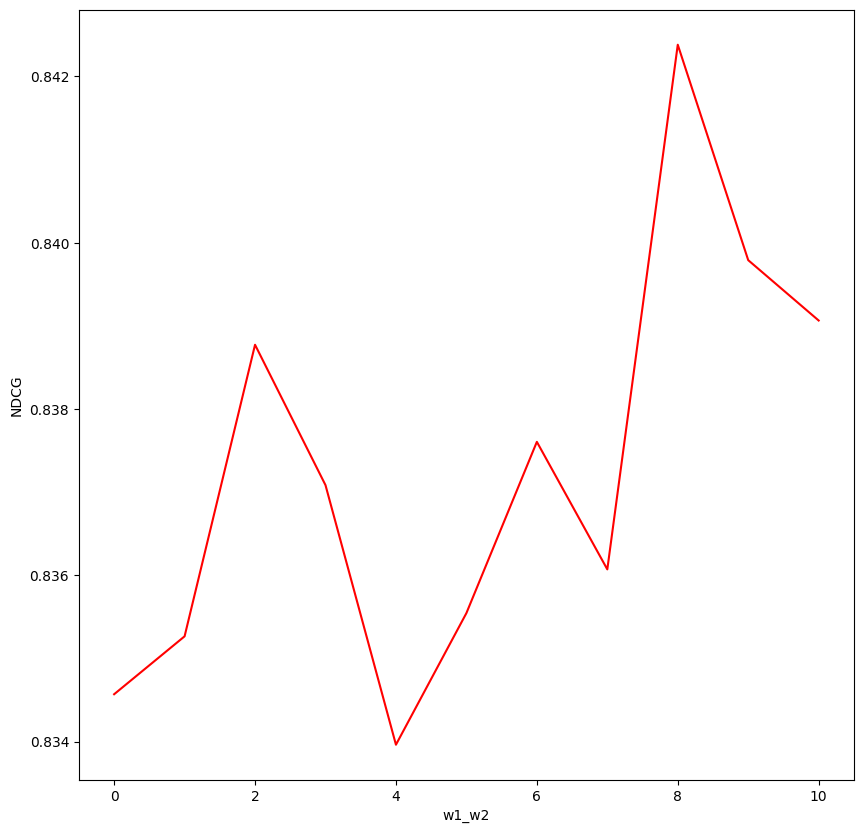

In [ ]:
#plot rmse
import matplotlib.pyplot as plt
  
# corresponding x axis values
x = list(range(len(mean_ndcg_explicit_list)))
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('w1_w2')
ax.set_ylabel('NDCG')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, mean_ndcg_explicit_list, color='red') #vd
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.show()

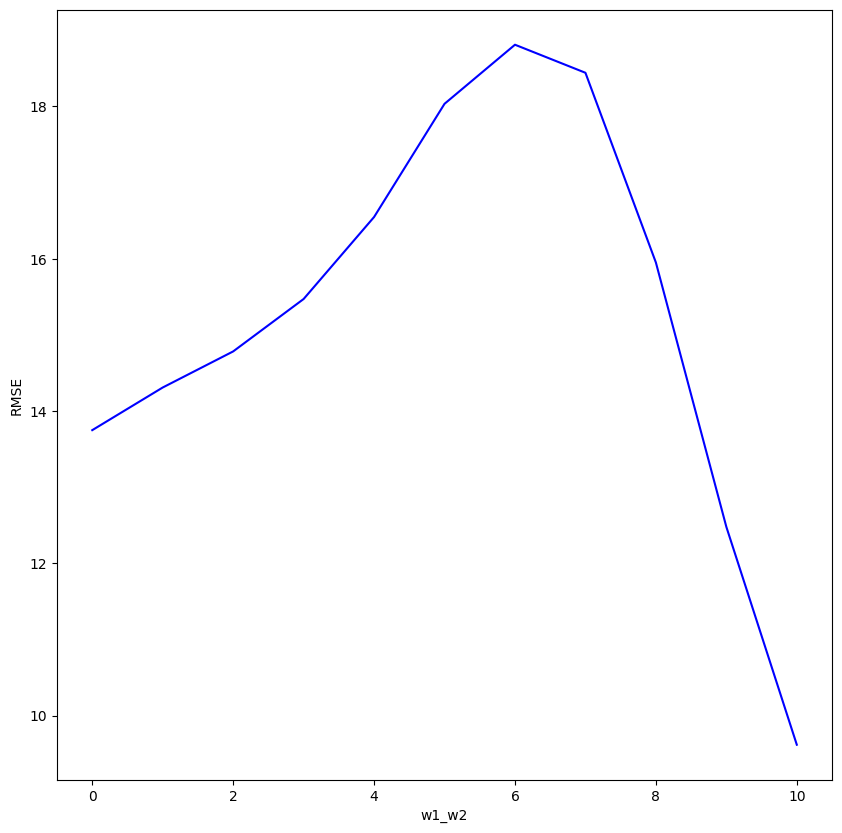

In [ ]:
#plot rmse
import matplotlib.pyplot as plt
  
# corresponding x axis values
x = list(range(len(mean_rmse_explicit_list)))
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('w1_w2')
ax.set_ylabel('RMSE')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, mean_rmse_explicit_list, color='blue') #vd
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.show()

**Optimum (w_1, w_2)= (0.9, 0.1)**

# **Experimentation of Case 4 with optimum w_1 and w_2 and variable seeds**

In [ ]:
mean_ndcg_explicit=[]
mean_rmse_explicit=[]
for sd in range(50):
    print("seed=", sd)
    print("----------------------------------------------")
    mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=True, seed=sd)
    dense_user_train_data = mf.train(epoch=40)
    Flags=[1,0,0,0,1,1,1,0,0,0]
    _, mean_ndcg_explicit_instance, mean_rmse_explicit_instance=entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.9, w_2=0.1 )
    mean_ndcg_explicit.append(mean_ndcg_explicit_instance)
    mean_rmse_explicit.append(mean_rmse_explicit_instance)

print("mean_ndcg_explicit: ", mean_ndcg_explicit)
print()
print("mean_rmse_explicit: ", mean_rmse_explicit)

seed= 0
----------------------------------------------
epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39

12.836535453796387
Mean of ndcg_explicit=0.8397904029427299
Mean of rmse_explicit=12.477997709214803
seed= 1
----------------------------------------------
epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39

12.7808

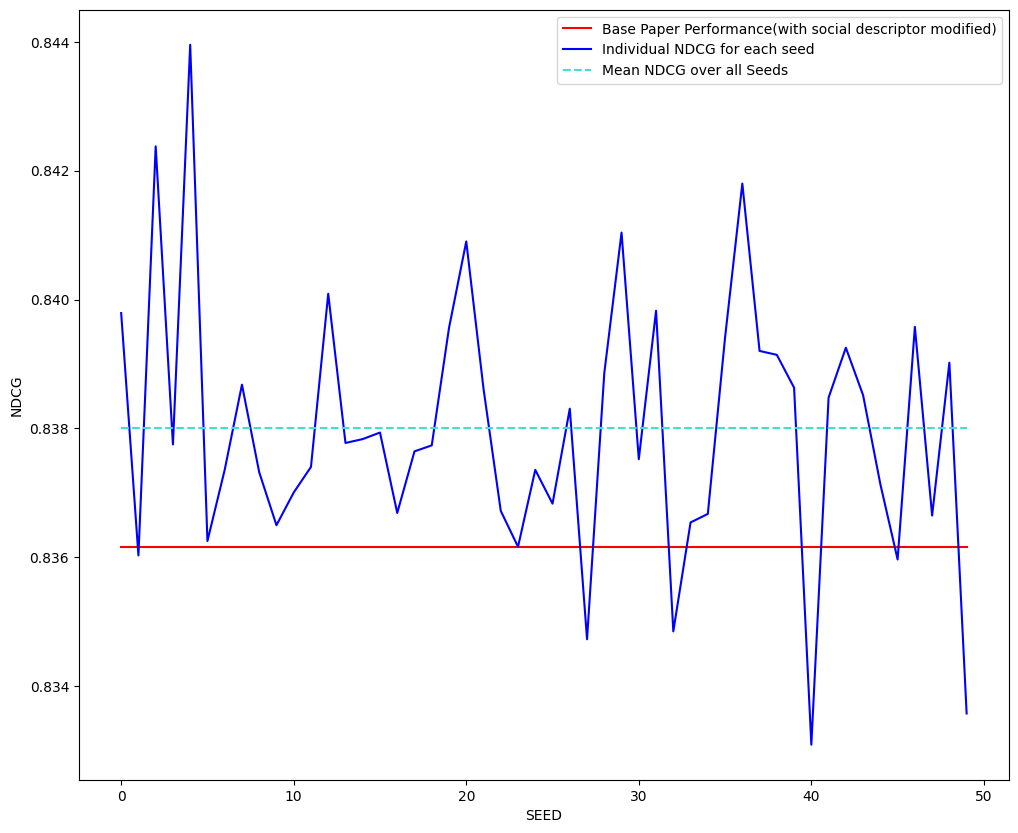

In [ ]:
#plot ndcg
import matplotlib.pyplot as plt
  
# corresponding x axis values
k=len(mean_ndcg_explicit)
avg_overall_ndcg=sum(mean_ndcg_explicit) / len(mean_ndcg_explicit)
x = list(range(k))
mean_overall = [avg_overall_ndcg]*k
base=[0.8361612486150191]*k
#base = [0.8346756663584216]*k
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('SEED')
ax.set_ylabel('NDCG')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, base, color='red', label='Base Paper Performance(with social descriptor modified)') 
ax.plot(x, mean_ndcg_explicit, color='blue', label='Individual NDCG for each seed') #vd
ax.plot(x, mean_overall,  linestyle='--', color='turquoise', label='Mean NDCG over all Seeds')
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

In [ ]:
avg_overall_ndcg

0.8380015598047608

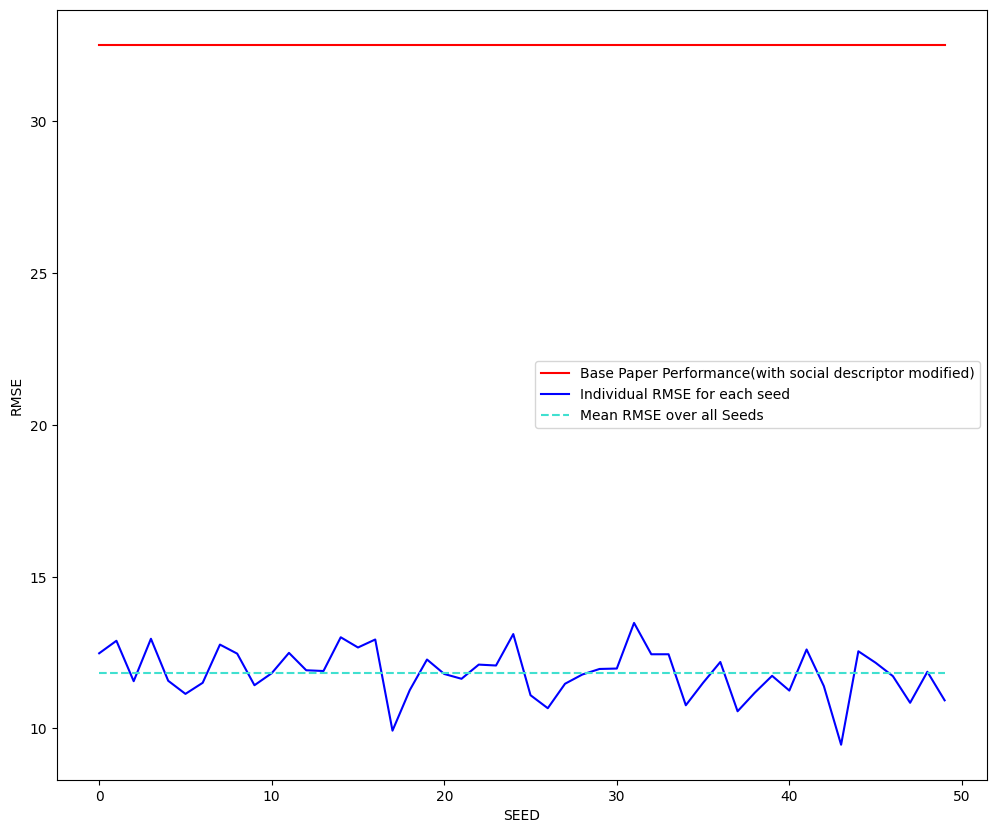

In [ ]:
#plot ndcg
import matplotlib.pyplot as plt
  
# corresponding x axis values
k=len(mean_rmse_explicit)
avg_overall_rmse=sum(mean_rmse_explicit) / len(mean_rmse_explicit)
x = list(range(k))
mean_overall_r = [avg_overall_rmse]*k
base = [32.52917062435187]*k
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('SEED')
ax.set_ylabel('RMSE')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, base, color='red', label='Base Paper Performance(with social descriptor modified)') 
ax.plot(x, mean_rmse_explicit, color='blue', label='Individual RMSE for each seed') #vd
ax.plot(x, mean_overall_r,  linestyle='--', color='turquoise', label='Mean RMSE over all Seeds')
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

In [ ]:
avg_overall_rmse

11.834903691871945

## **ENTIRE ANALYSIS USING VD DISSIMILARITY**

In [ ]:
mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False)
dense_user_train_data = mf.train(epoch=40)

epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39


In [ ]:
dense_user_train_data

**with step enable**

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit= entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


15.67470383644104
Mean of ndcg_explicit=0.837945828601229
Mean of rmse_explicit=18.33231172434243


**without step enabled**

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit= entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.867614269256592
Mean of ndcg_explicit=0.838705613433316
Mean of rmse_explicit=17.913079651880846


In [ ]:
mf_improved = IMPROVED_MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False)
dense_user_train_data = mf_improved.train(epoch=40)

epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39


**With step enabled**

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit= entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


15.885193586349487
Mean of ndcg_explicit=0.8362905689376355
Mean of rmse_explicit=23.20398534489581


**Without Step enabled**

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
overall_group_item_output_mat, mean_ndcg_explicit, mean_rmse_explicit= entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.879684448242188
Mean of ndcg_explicit=0.8362905689376355
Mean of rmse_explicit=23.20398534489581


**finding optimum w1 and w2**

In [ ]:
mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False)
dense_user_train_data_approx = mf.train(epoch=40)

epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39


In [ ]:
dense_user_train_data_approx

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
mean_ndcg_explicit_list=[] 
mean_rmse_explicit_list=[]
w_1=0.0
w_2=1.0
while w_1<=1.0 and w_2>=0.0 and w_1+w_2==1.0:
    print("Processing w_1 and w_2=", w_1, ", ", w_2)
    mean_ndcg_explicit_instance=0.0
    mean_rmse_explicit_instance=0.0
    _,mean_ndcg_explicit_instance, mean_rmse_explicit_instance=entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1, w_2 )
    mean_ndcg_explicit_list.append(mean_ndcg_explicit_instance)
    mean_rmse_explicit_list.append(mean_rmse_explicit_instance)
    w_1+=0.1
    w_2-=0.1

Processing w_1 and w_2= 0.0 ,  1.0

14.973427057266235
Mean of ndcg_explicit=0.8370220201581691
Mean of rmse_explicit=121.35962438696154
Processing w_1 and w_2= 0.1 ,  0.9

16.903441190719604
Mean of ndcg_explicit=0.8360796079712784
Mean of rmse_explicit=108.90158631495943
Processing w_1 and w_2= 0.2 ,  0.8

14.908316373825073
Mean of ndcg_explicit=0.8353015423051472
Mean of rmse_explicit=96.56625665649841
Processing w_1 and w_2= 0.30000000000000004 ,  0.7000000000000001

14.956209659576416
Mean of ndcg_explicit=0.8363943895619605
Mean of rmse_explicit=84.12259926445655
Processing w_1 and w_2= 0.4 ,  0.6000000000000001

15.015834331512451
Mean of ndcg_explicit=0.8355489049180708
Mean of rmse_explicit=71.78192329414154
Processing w_1 and w_2= 0.5 ,  0.5000000000000001

15.078013896942139
Mean of ndcg_explicit=0.8335982919115903
Mean of rmse_explicit=59.34070165646296
Processing w_1 and w_2= 0.6 ,  0.40000000000000013

14.847352504730225
Mean of ndcg_explicit=0.8371096714305583
Mean of r

**plot graph with variable w1 w2**

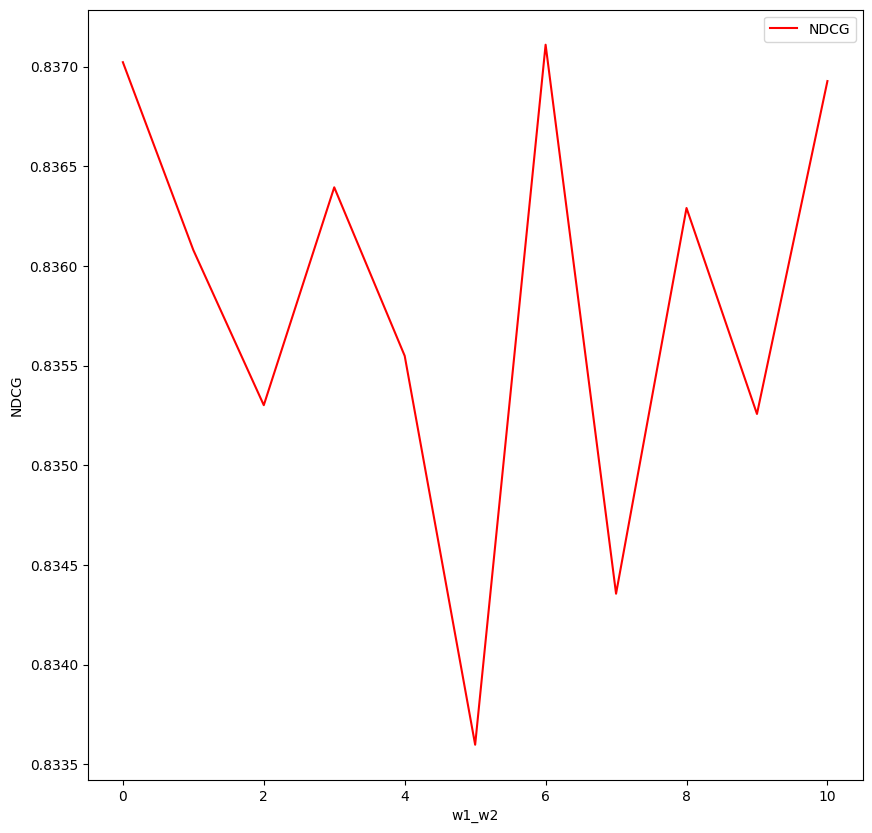

In [ ]:
#plot rmse
import matplotlib.pyplot as plt
  
# corresponding x axis values
x = list(range(len(mean_ndcg_explicit_list)))
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('w1_w2')
ax.set_ylabel('NDCG')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, mean_ndcg_explicit_list, color='red', label='NDCG') #vd

#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

Analysis: optimum ndcg: (0.7,0.3) -> (w1, w2)

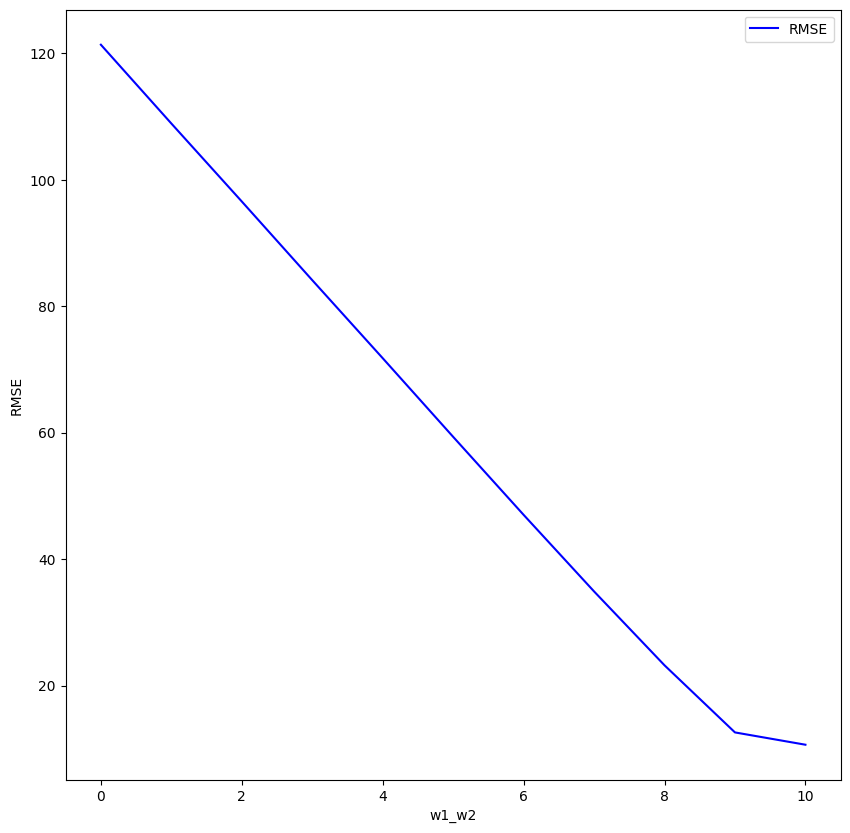

In [ ]:
#plot rmse
import matplotlib.pyplot as plt
  
# corresponding x axis values
x = list(range(len(mean_rmse_explicit_list)))
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('w1_w2')
ax.set_ylabel('RMSE')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, mean_rmse_explicit_list, color='blue', label='RMSE') #vd
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

**using w1=0.7, w2=0.3 for variable seeds**

In [ ]:
mean_ndcg_explicit=[]
mean_rmse_explicit=[]
for sd in range(50):
    print("seed=", sd)
    print("----------------------------------------------")
    mf = MF(dataset.user_trainMatrix, num_users, num_groups, latent=5, lr=0.001, reg=0.01, decay_rate=0.1, step_size = 10, step_enabled=False, seed=sd)
    dense_user_train_data = mf.train(epoch=40)
    Flags=[1,0,0,0,1,1,0,1,0,0]
    _, mean_ndcg_explicit_instance, mean_rmse_explicit_instance=entire_algo1(Flags, dense_user_train_data, dataset.group_trainMatrix, w_1=0.7, w_2=0.3 )
    mean_ndcg_explicit.append(mean_ndcg_explicit_instance)
    mean_rmse_explicit.append(mean_rmse_explicit_instance)

print("mean_ndcg_explicit: ", mean_ndcg_explicit)
print()
print("mean_rmse_explicit: ", mean_rmse_explicit)

seed= 0
----------------------------------------------
epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39

16.346802234649658
Mean of ndcg_explicit=0.8361471179605309
Mean of rmse_explicit=25.140727620904148
seed= 1
----------------------------------------------
epoch= 0
epoch= 1
epoch= 2
epoch= 3
epoch= 4
epoch= 5
epoch= 6
epoch= 7
epoch= 8
epoch= 9
epoch= 10
epoch= 11
epoch= 12
epoch= 13
epoch= 14
epoch= 15
epoch= 16
epoch= 17
epoch= 18
epoch= 19
epoch= 20
epoch= 21
epoch= 22
epoch= 23
epoch= 24
epoch= 25
epoch= 26
epoch= 27
epoch= 28
epoch= 29
epoch= 30
epoch= 31
epoch= 32
epoch= 33
epoch= 34
epoch= 35
epoch= 36
epoch= 37
epoch= 38
epoch= 39

15.8772

**Base Performance with VD**

In [ ]:
Flags=[1,0,0,0,1,1,0,1,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.565309047698975
Mean of ndcg_explicit=0.8412134692174486
Mean of rmse_explicit=184.098172081226


In [ ]:
Flags=[0,1,0,0,1,1,0,1,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.170552968978882
Mean of ndcg_explicit=0.839546575042933
Mean of rmse_explicit=204.30133635549365


In [ ]:
Flags=[0,0,1,0,1,1,0,1,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.292039155960083
Mean of ndcg_explicit=0.8387032470874125
Mean of rmse_explicit=194.0992899782647


In [ ]:
Flags=[0,0,0,1,1,1,0,1,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.029237031936646
Mean of ndcg_explicit=0.8412134692174486
Mean of rmse_explicit=184.098172081226


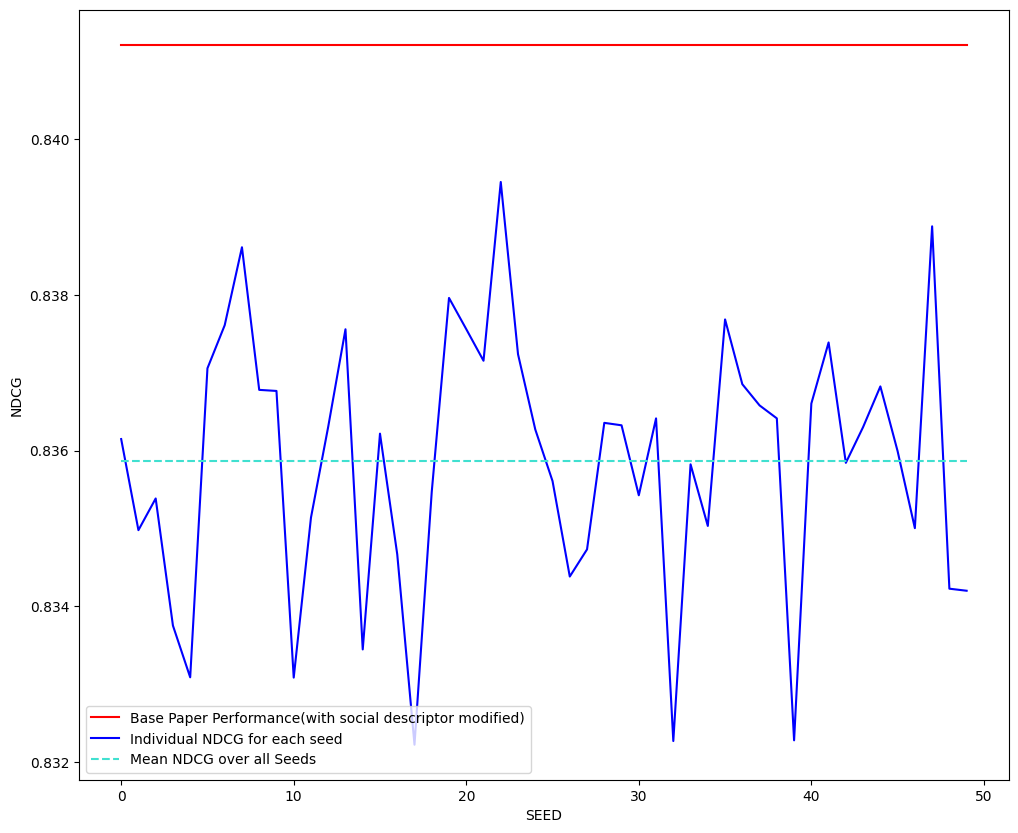

In [ ]:
#plot ndcg
import matplotlib.pyplot as plt
  
# corresponding x axis values
k=len(mean_ndcg_explicit)
avg_overall_ndcg=sum(mean_ndcg_explicit) / len(mean_ndcg_explicit)
x = list(range(k))
mean_overall = [avg_overall_ndcg]*k
base = [0.8412134692174486]*k
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('SEED')
ax.set_ylabel('NDCG')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, base, color='red', label='Base Paper Performance(with social descriptor modified)') 
ax.plot(x, mean_ndcg_explicit, color='blue', label='Individual NDCG for each seed') #vd
ax.plot(x, mean_overall,  linestyle='--', color='turquoise', label='Mean NDCG over all Seeds')
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

In [ ]:
avg_overall_ndcg

0.8358662747939708

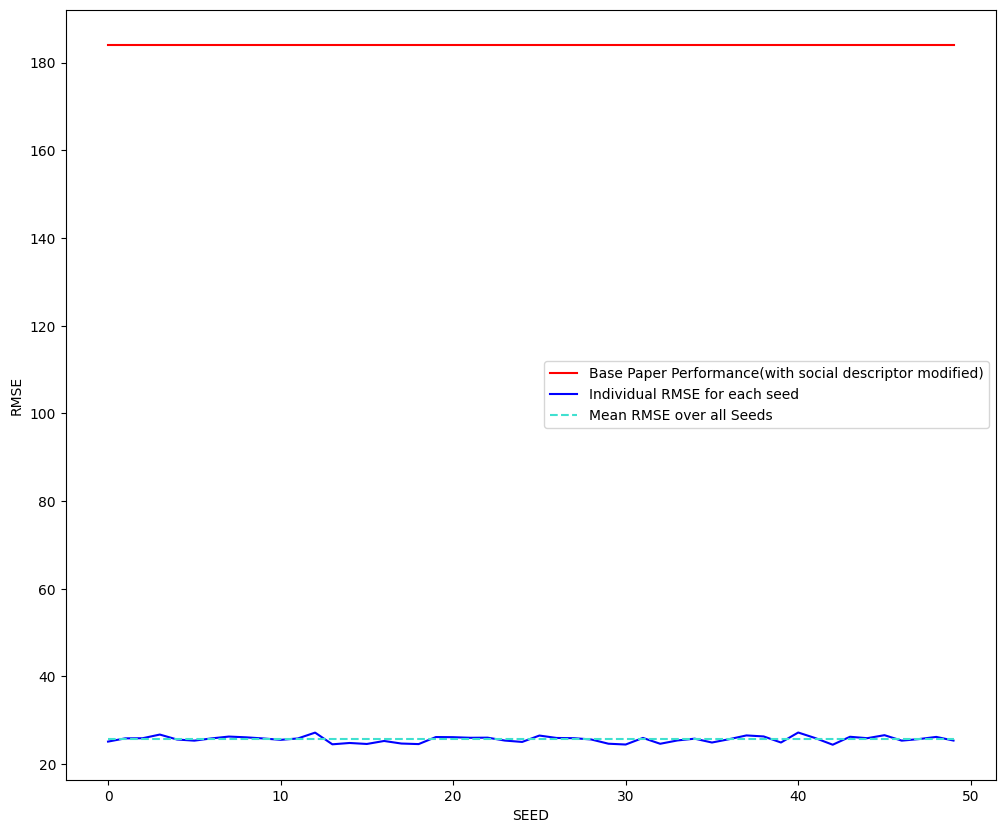

In [ ]:
#plot ndcg
import matplotlib.pyplot as plt
  
# corresponding x axis values
k=len(mean_rmse_explicit)
avg_overall_rmse=sum(mean_rmse_explicit) / len(mean_rmse_explicit)
x = list(range(k))
mean_overall_r = [avg_overall_rmse]*k
base = [184.098172081226]*k
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('SEED')
ax.set_ylabel('RMSE')
#ax.plot(x, Precision_at_k, color='blue')
ax.plot(x, base, color='red', label='Base Paper Performance(with social descriptor modified)') 
ax.plot(x, mean_rmse_explicit, color='blue', label='Individual RMSE for each seed') #vd
ax.plot(x, mean_overall_r,  linestyle='--', color='turquoise', label='Mean RMSE over all Seeds')
#ax.bar(x, rmse_explicit[1], color='blue') #ap
# function to show the plot
plt.legend()
plt.show()

In [ ]:
avg_overall_rmse

25.660445182118732

**OTHER BASE CASES_ no expertise, no dissimilarities**

In [ ]:
Flags=[1,0,0,0,0,1,1,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


11.28917121887207
Mean of ndcg_explicit=0.8322651031153401
Mean of rmse_explicit=28.722866257704307


In [ ]:
Flags=[1,0,0,0,0,1,0,1,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


14.170938491821289
Mean of ndcg_explicit=0.8414503754747645
Mean of rmse_explicit=184.11727595115215


In [ ]:
Flags=[1,0,0,0,1,0,0,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


7.102498292922974
Mean of ndcg_explicit=0.820648291822202
Mean of rmse_explicit=26.01475470240458


In [ ]:
Flags=[1,0,0,0,0,0,0,0,0,0]
_, _, _=entire_algo1(Flags, dataset.user_trainMatrix, dataset.group_trainMatrix, w_1=0.8, w_2=0.2 )


5.799253702163696
Mean of ndcg_explicit=0.8226404996743704
Mean of rmse_explicit=20.368845394065897


## **COMPARISON**

# *a. EXPLICIT RECOMMENDATION*


\begin{array}{|c|c|c|c|c|} \hline
Social Relationship Consideration &Social Descriptor Factors & Expertise Descriptor & Dissimilarity Descriptor & (W1,W2) &MF Type & LR Schedule  & NDCG(\%) &RMSE & Computation Time(s)\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & APD & (0.8,0.2) & - &-  & 83.62 & 32.53 & 10.6531\\ \hline
Similar & Max Satisfaction & yes & APD & (0.8,0.2) & - & - & 83.47 & 24.21 & 20.6191  \\ \hline
Diverse & Avg Satisfaction & yes & APD & (0.8,0.2) & - & - & 83.25 & 31.29 & 24.9168 \\ \hline
Dissimilar & Min Satisfaction & yes & APD & (0.8,0.2) & - & - & 83.62 & 32.53 & 14.7467  \\ \hline
- & - & - & - & - & - & - & - & - & -  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery  & no & APD & (0.8,0.2) & - & - & 83.23 & 28.72 & 11.2892  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery  & no & VD & (0.8,0.2) & - & - & 84.14 & 184.12 & 14.1709  \\ \hline
- & - & - & - & - & - & - & - & - & -  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery  & yes & no & (0.8,0.2) & - & - & 82.06 & 26.01 & 7.1025  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery  & no & no & (0.8,0.2) & - & - & 82.26 & 20.37 & 5.7992  \\ \hline
- & - & - & - & - & - & - & - & - & -  \\ \hline
- & - & - & - & - & - & - & - & - & -  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & APD & (0.8,0.2) & Default & Exp Decay & 83.98 & 14.58 & 19.1779\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & APD & (0.8,0.2) & Improved & Exp Decay & 83.65 & **7.03** & 18.5052\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & APD & (0.8,0.2) & Default & Exp Decay with Step Size & **84.24** & 15.95 & **17.9007**\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & APD & (0.8,0.2) & Improved & Exp Decay with Step Size & 83.27 & 7.21 & 18.4504\\ \hline
- & - & - & - & - & - & - & - & -  \\ \hline
- & - & - & - & - & - & - & - & -  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & VD & (0.8,0.2) & - &-  & 84.12 & 184.10 & 14.5653\\ \hline
Similar & Max Satisfaction & yes & VD & (0.8,0.2) & - & - & 83.95 & 204.30 & 14.1705  \\ \hline
Diverse & Avg Satisfaction & yes & VD & (0.8,0.2) & - & - & 83.87 & 194.10 & 14.2920 \\ \hline
Dissimilar & Min Satisfaction & yes & VD & (0.8,0.2) & - & - & 84.12 & 184.10 & 14.0292  \\ \hline
- & - & - & - & - & - & - & - & - & -  \\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & VD & (0.8,0.2) & Default & Exp Decay & 83.87 & **17.91** & 14.8676\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & VD & (0.8,0.2) & Improved & Exp Decay & 83.63 & 23.20 & 14.8797\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & VD & (0.8,0.2) & Default & Exp Decay with Step Size & 83.79 & 18.33 & 15.6747\\ \hline
All & Max Satifaction, Average Satisfaction, Minimum Misery & yes & VD & (0.8,0.2) & Improved & Exp Decay with Step Size & 83.63 & 23.20 & 15.8852\\ \hline
\end{array}



# **READ ABOUT:**

Implicit group recommendation techniques paper

**For Implicit Rating**

---



In [ ]:
#using jaccard - own algorithm
import itertools
def implicit_dissimilarity_jaccard_func(implicit_user_trainMatrix):

    
    Dissimilarity_mat_implicit=np.zeros((num_groups, num_items))

    for group_id in dataset.group_user_Dict:
        #print(group_id)
        group_members= dataset.group_user_Dict[group_id]
        num_members=len(group_members)
        for i in range(num_items):
            dissimilarity=0
            for m, n in itertools.combinations(range(num_members), 2):

              user1_items = implicit_user_trainMatrix[m]
              user2_items = implicit_user_trainMatrix[n]
              jaccard_similarity = np.sum(np.logical_and(user1_items, user2_items)) / np.sum(np.logical_or(user1_items, user2_items))

              dissimilarity = dissimilarity+ (1 - jaccard_similarity)
            Dissimilarity_mat_implicit[group_id][i]=(2*dissimilarity)/(num_members*(num_members-1) )
    return Dissimilarity_mat_implicit
    #print(Dissimilarity_mat_implicit)

In [ ]:
#using pearson coeff - own algorithm
from scipy.stats import pearsonr 

def implicit_dissimilarity_pearson_func(implicit_user_trainMatrix):

    
    Dissimilarity_mat_implicit_using_pearson=np.zeros((num_groups, num_items))

    for group_id in dataset.group_user_Dict:
        print(group_id)
        group_members= dataset.group_user_Dict[group_id]
        num_members=len(group_members)
        for i in range(num_items):
           dissimilarity = 0
           for m, n in itertools.combinations(range(num_members), 2):
               user1_items = implicit_user_trainMatrix[m]
               user2_items = implicit_user_trainMatrix[n]
               pearson_similarity, _ = pearsonr(user1_items, user2_items)
               dissimilarity += 1 - pearson_similarity
           Dissimilarity_mat_implicit_using_pearson[group_id][i]=(2*dissimilarity)/(num_members*(num_members-1) )
    return Dissimilarity_mat_implicit_using_pearson
    #print(Dissimilarity_mat_implicit)

In [ ]:
Dissimilarity_mat_implicit_using_pearson=implicit_dissimilarity_pearson_func(dataset.implicit_user_trainMatrix)

import pickle
# open a file in binary mode to write the pickled data
with open("Dissimilarity_mat_implicit_using_pearson.pkl", "wb") as f:
    # dump the object into the file
    pickle.dump(Dissimilarity_mat_implicit_using_pearson, f)

In [ ]:
#import pickle
#with open("Dissimilarity_mat_implicit_using_pearson.pkl", "rb") as f:
#    # load the pickled object from the file
#    Dissimilarity_mat_implicit_using_pearson = pickle.load(f)



**Implicit MF**

In [ ]:
class MF_implicit:

    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie paris having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.user_test_like = []
        for u in range(self.num_user):
            self.user_test_like.append(np.where(self.test_mat[u, :] > 0)[0])

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for users, size (#movie, self.latent), randomly initialized


    def negative_sampling(self):
        negative_movie = np.random.choice(np.arange(self.num_movie), size=(len(self.sample_user)), replace=True)
        true_negative = self.train_mat[self.sample_user, negative_movie] == 0
        negative_user = self.sample_user[true_negative]
        negative_movie = negative_movie[true_negative]
        return np.concatenate([self.sample_user, negative_user]), np.concatenate([self.sample_movie, negative_movie])

    def train(self, epoch=20):
        """
        Goal: Write your code to train your matrix factorization model for epoch iterations in this function
        Input: epoch -- the number of training epoch 
        """
        
        for ep in range(epoch):
            """ 
            Write your code here to implement the training process for one epoch, 
            at the end of each epoch, run self.test() to evaluate current version of MF.
            """
            print("epoch={}".format(ep))
            negative_training_set=self.negative_sampling()
            perm = np.random.permutation(len(negative_training_set[0]))

            # use fancy indexing to select the elements in the shuffled order
            negative_training_set_0 = negative_training_set[0][perm]
            negative_training_set_1 = negative_training_set[1][perm]

            #print(negative_training_set)
            #print((self.P).shape)
            #print((self.Q).shape)
            #print((QT).shape)
            #np.random.shuffle(negative_training_set)
            #QT=self.Q.T
            
            for i in range(len(negative_training_set[0])):
                user=negative_training_set_0[i]
                item=negative_training_set_1[i]
              ## Concurrently updated
                self.P[user],self.Q[item]=self.P[user]-self.lr*(2*(self.P[user].dot(self.Q[item])-self.train_mat[user,item])*self.Q[item]
                    +2*self.reg*self.P[user]),self.Q[item]-self.lr*(2*((self.P[user].dot(self.Q[item])-self.train_mat[user,item])*self.P[user]
                    +2*self.reg*self.Q[item]))
              
            self.test()
            
        """
        End of your code for this function
        """
            
    def predict(self):
        """
        Write your code here to implement the prediction function, which generates the ranked lists of movies 
        by the trained MF for every user, store the result (named 'recommendation') in a numpy array of size (#user, 50), where entry (u, k) 
        represents the movie id that is ranked at position k in the recommendation list to user u. Return the 'recommendation' variable. 
        """
        prediction_mat = np.matmul(self.P, self.Q.T)
        recommendation = []
        for u in range(self.num_user):
            scores = prediction_mat[u]
            train_like = np.where(train_mat[u, :] > 0)[0]
            scores[train_like] = -9999
            top50_iid = np.argpartition(scores, -50)[-50:]
            top50_iid = top50_iid[np.argsort(scores[top50_iid])[-1::-1]]
            recommendation.append(top50_iid)
        recommendation = np.array(recommendation)
        return recommendation
        
        
        """
        End of your code for this function
        """
        
    
    def test(self):
        recommendation = self.predict()

        recalls = np.zeros(3)
        precisions = np.zeros(3)
        user_count = 0.

        for u in range(self.num_user):
            test_like = self.user_test_like[u]
            test_like_num = len(test_like)
            if test_like_num == 0:
                continue
            rec = recommendation[u, :]
            hits = np.zeros(3)
            for k in range(50):
                if rec[k] in test_like:
                    if k < 50:
                        hits[2] += 1
                        if k < 20:
                            hits[1] += 1
                            if k < 5:
                                hits[0] += 1
            recalls[0] += (hits[0] / test_like_num)
            recalls[1] += (hits[1] / test_like_num)
            recalls[2] += (hits[2] / test_like_num)
            precisions[0] += (hits[0] / 5.)
            precisions[1] += (hits[1] / 20.)
            precisions[2] += (hits[2] / 50.)
            user_count += 1

        recalls /= user_count
        precisions /= user_count


        print('recall@5\t[%.6f],\t||\t recall@20\t[%.6f],\t||\t recall@50\t[%.6f]' % (recalls[0], recalls[1], recalls[2]))
        print('precision@5\t[%.6f],\t||\t precision@20\t[%.6f],\t||\t precision@50\t[%.6f]' % (precisions[0], precisions[1], precisions[2]))
        print('')

**IMPLICIT RECOMMENDATION PERFORMANCE**

In [ ]:
def calculate_Precision_Recall_at_K(social_relation_output_implicit, implicit_group_trainMatrix ):
    #k=100
  Recall_at_k=np.zeros(num_groups)
  Precision_at_k=np.zeros(num_groups)
  for group_id in range(len(social_relation_output_implicit)):
      TP=0
      TP_FP=0
      TP_FN=np.sum(implicit_group_trainMatrix[group_id], axis=0)

      for item_id in social_relation_output_implicit[group_id]:
          if implicit_group_trainMatrix[group_id][item_id]==1:
              TP+=1
              TP_FP+=1
          else:
              TP_FP+=1
      Precision_at_k[group_id]=(TP/TP_FP)
      if TP_FN!=0:
          Recall_at_k[group_id]=(TP/TP_FN)
  return Precision_at_k, Recall_at_k

**IMPLICIT RECOMMENDATION ANALYSIS**


In [ ]:
import matplotlib.pyplot as plt
  
def Precision_at_k_plot(Precision_at_k ):
    # corresponding x axis values
    x = list(range(1, num_groups+1))

    #fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Group Id')
    ax.set_ylabel('Precision@100')
    #ax.plot(x, Precision_at_k, color='blue')
    ax.bar(x, Precision_at_k[0], color='blue') #Jaccard
    #ax.bar(x, Precision_at_k[1], color='red') #Pearson
    # function to show the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
  
def Recall_at_k_plot(Recall_at_k ):
    # corresponding x axis values
    x = list(range(1, num_groups+1))

    #fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    fig = plt.figure(figsize=(20, 10))
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_xlabel('Group Id')
    ax2.set_ylabel('Recall@100')
    ax2.bar(x, Recall_at_k[0], color='blue')
    #ax2.bar(x, Recall_at_k[1], color='red')
    plt.show()

# **IMPLICIT RECOMMENDATION ANALYSIS**

In [ ]:
#permuted pipeline creation
#IMPLICIT
w_1=0.8
w_2=0.2

#using Dis= Pearson/Jaccard Implicit
overall_group_item_output_mat=concensus_heuristic_function(social_descriptor_groupwise, expertise_in_group_members_mat, Dissimilarity_mat,  dataset.implicit_user_trainMatrix, w_1, w_2)

#Top k Ranking
social_relation_output_implicit=rank_top_k(overall_group_item_output_mat, 100)


Precision_at_k, Recall_at_k= calculate_Precision_Recall_at_K(social_relation_output_implicit, dataset.implicit_group_trainMatrix )

#print(Precision_at_k)
mean_Precision_at_k = sum(Precision_at_k) / len(Precision_at_k)
print("Mean of Precision@k={}".format(mean_Precision_at_k))

print()
#print(Recall_at_k)
mean_Recall_at_k = sum(Recall_at_k) / len(Recall_at_k)
print("Mean of Recall@k={}".format(mean_Recall_at_k))

##print(Precision_at_k)
#mean_Pearson_Precision_at_k = sum(Precision_at_k_Pearson) / len(Precision_at_k_Pearson)
#print("Mean of Pearson Precision@k={}".format(mean_Pearson_Precision_at_k))
#
#print()
##print(Recall_at_k)
#mean_Pearson_Recall_at_k = sum(Recall_at_k_Pearson) / len(Recall_at_k_Pearson)
#print("Mean of Pearson Recall@k={}".format(mean_Pearson_Recall_at_k))

In [ ]:
Recall_at_k=[]
Recall_at_k.append(Recall_at_k)
#Recall_at_k.append(Recall_at_k_Jaccard)
#Recall_at_k.append(Recall_at_k_Pearson)
Recall_at_k_plot(Recall_at_k )

In [ ]:
Precision_at_k=[]
Precision_at_k.append(Precision_at_k)
#Precision_at_k.append(Precision_at_k_Jaccard)
#Precision_at_k.append(Precision_at_k_Pearson)
Precision_at_k_plot(Precision_at_k )

# *b. IMPLICIT RECOMMENDATION*

**Assumption:** 

1.   K=100



\begin{array}{|c|c|c|c|c|} \hline
Social Relationship & Expertise Descriptor & Dissimilarity Descriptor &Precision@K & Recall@K \\ \hline
yes & yes & Jaccard & 23.71\% & 7.23\%\\ \hline
yes & yes & Pearson & 23.71\% & 7.23\%\\ \hline
foo & bar & foo & bar & 1  \\ \hline
\end{array}
